In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


###Amount of people who embarked from these 3 locations.

In [3]:
train.Embarked.value_counts()

S    644
C    168
Q     77
dtype: int64

,Survived
Sex,
female,0.742038
male,0.188908


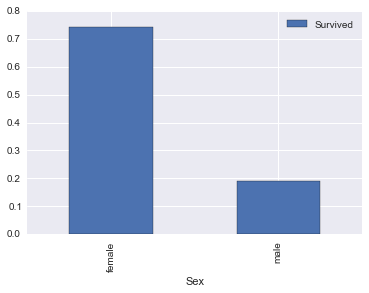

In [4]:
gender_survivor_table = pd.pivot_table(train, index=['Sex'], values=['Survived'])
gender_survivor_table.plot(kind='bar')
gender_survivor_table

In [5]:
test = pd.read_csv('titanic/test.csv')
test['Survived'] = 0
test.loc[test['Sex'] == 'female', 'Survived'] = 1
test = test[['PassengerId', 'Survived']]
test.to_csv('titanic/gender_set.csv', index=False)


##This entry got my Kaggle score to .76555. This test.csv breaks down the data into male and female.

I broke down the passengers from male and female by adult, child, and unknown for those who did not specifiy their age range. 

Survived
Sex    AgeRange          
female adult     0.771845
       child     0.690909
       unknown   0.679245
male   adult     0.177215
       child     0.396552
       unknown   0.129032

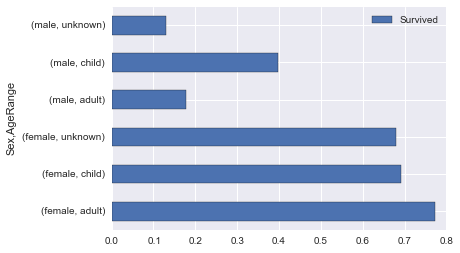

In [6]:
def create_age_range(age):
    if str(age) == 'nan':
        return 'unknown'
    elif age >= 18:
        return 'adult'
    else:
        return 'child'
    
train['AgeRange'] = train['Age'].map(create_age_range)
age_gender_survivor_table = pd.pivot_table(train, index=['Sex','AgeRange'], values=['Survived'])
age_gender_survivor_table.plot(kind='barh')
age_gender_survivor_table

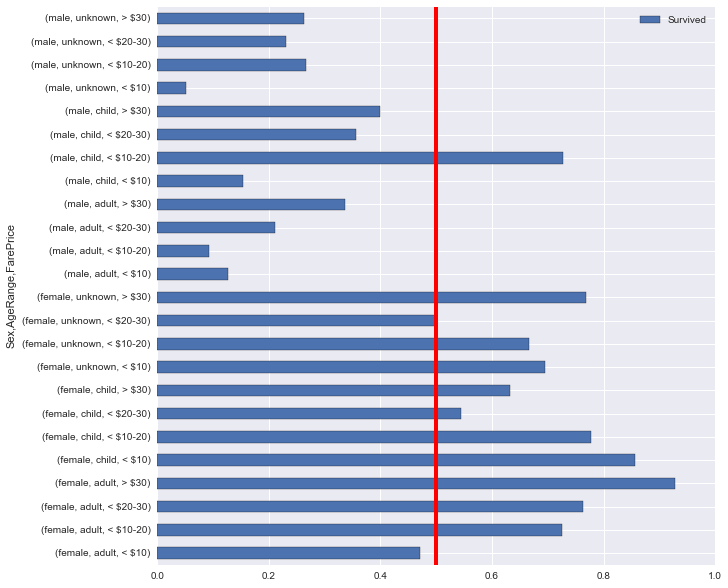

In [7]:
def create_fare_range(fare):
    if fare < 10:
        return '< $10'
    elif fare < 20:
        return '< $10-20'
    elif fare < 30:
        return '< $20-30'
    else:
        return '> $30'
    
train['FarePrice'] = train['Fare'].map(create_fare_range)

fare_survivor_table = pd.pivot_table(train, index=['Sex','AgeRange','FarePrice'],values=['Survived'])
fare_survivor_table
fare_survivor_table.plot(kind='barh', figsize=(10,10))
plt.axvline(x=.5, linewidth=4, color='r')


##This graph above shows the break of the gender of passenger, age range, and price paid for their ticket.

In [8]:
test = pd.read_csv('titanic/test.csv')
test['Survived'] = 0
test.loc[(test['Sex'] == 'female'), 'Survived'] = 1
test.loc[(test['Sex'] == 'female') & (test['Fare'] > 30) & (test['Age'] > 18), 'Survived'] = 0
test = test[['PassengerId', 'Survived']]
test.to_csv('titanic/gender_fare_set.csv', index=False)

Looking back, I should not have tested the females who paid more then $30 for a ticket and who were older then 18.  This group had a very high survival rate. 

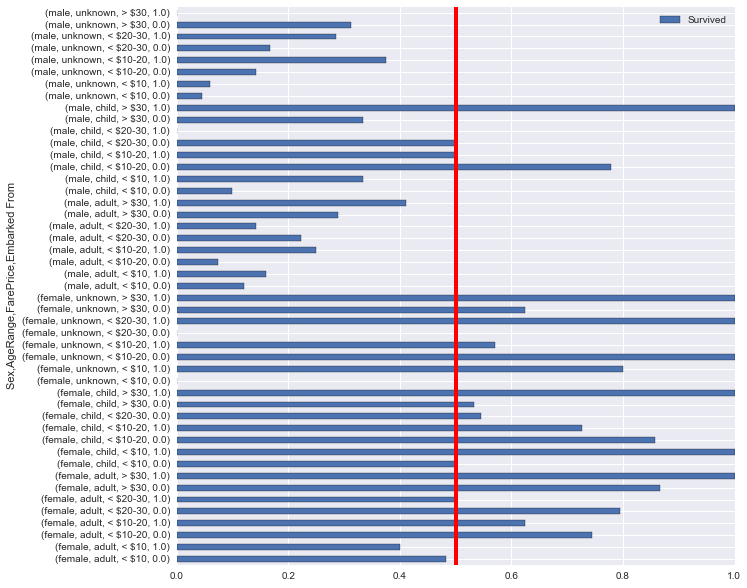

In [9]:
location_dict = {'S': 0, 'C': 1, 'Q': 1}
train['Embarked From'] = train['Embarked'].map(location_dict)
fare_location_survivor_table = pd.pivot_table(train, index=['Sex','AgeRange', 'FarePrice', 'Embarked From'],values=['Survived'])
fare_location_survivor_table.plot(kind='barh', figsize=(10,10))
plt.axvline(x=.5, linewidth=4, color='r')



In [10]:
test = pd.read_csv('titanic/test.csv')
test['Survived'] = 0

test.loc[(test['Sex'] == 'female'), 'Survived'] = 1
test.loc[(test['Sex'] == 'female') & (test['Fare'] < 10) & (test['Age'] > 18) & (test['Embarked'] == 'S'), 'Survived'] = 0
test = test[['PassengerId', 'Survived']]
test.to_csv('titanic/gender_location_fare_set.csv', index=False)


##This test.csv looked at females whose tickets were less than $10, older than 18 and embarked from Southampton. This increased my kaggle score to .77033. This was the best kaggle score I received.

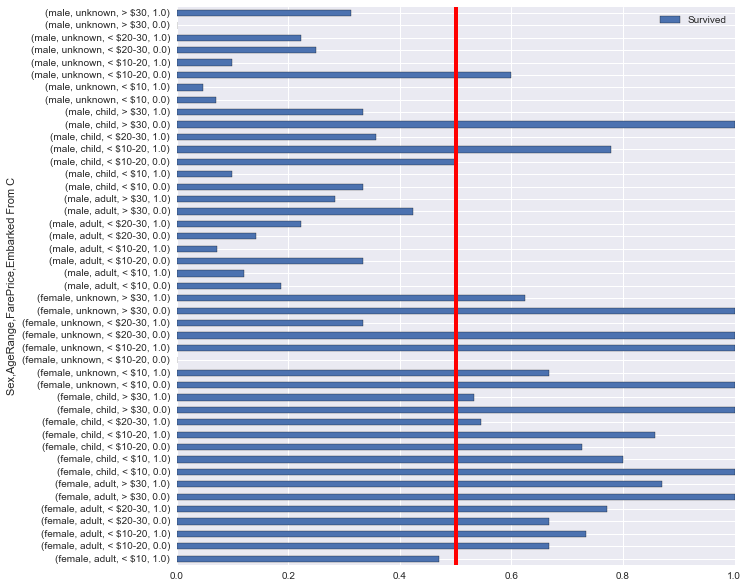

In [11]:
new_location_dict = {'S': 1, 'C': 0, 'Q': 1}

train['Embarked From C'] = train['Embarked'].map(new_location_dict)
fare_new_location_survivor_table = pd.pivot_table(train, index=['Sex','AgeRange', 'FarePrice', 'Embarked From C'],values=['Survived'])
fare_new_location_survivor_table.plot(kind='barh', figsize=(10,10))
plt.axvline(x=.5, linewidth=4, color='r')


In [12]:
test = pd.read_csv('titanic/test.csv')
test['Survived'] = 0

test.loc[(test['Sex'] == 'female'), 'Survived'] = 1
test.loc[(test['Sex'] == 'female') & (test['Fare'] < 10) & (test['Age'] > 18) & (test['Embarked'] == 'C'), 'Survived'] = 0
test = test[['PassengerId', 'Survived']]
test.to_csv('titanic/gender_new1_location_fare_set.csv', index=False)

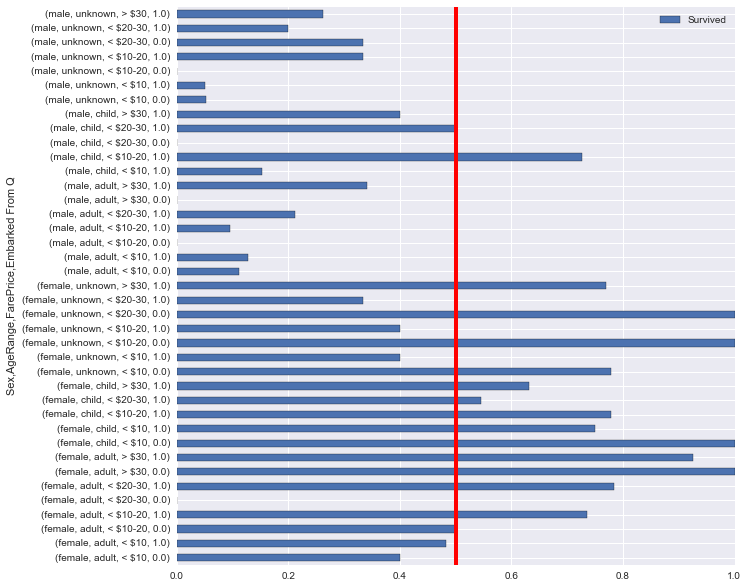

In [13]:
last_location_dict = {'S': 1, 'C': 1, 'Q': 0}

train['Embarked From Q'] = train['Embarked'].map(last_location_dict)
fare_last_location_survivor_table = pd.pivot_table(train, index=['Sex','AgeRange', 'FarePrice', 'Embarked From Q'],values=['Survived'])
fare_last_location_survivor_table.plot(kind='barh', figsize=(10,10))
plt.axvline(x=.5, linewidth=4, color='r')


In [14]:
test = pd.read_csv('titanic/test.csv')
test['Survived'] = 0

test.loc[(test['Sex'] == 'female'), 'Survived'] = 1
test.loc[(test['Sex'] == 'female') & (test['Fare'] < 10) & (test['Age'] > 18) & (test['Embarked'] == 'Q'), 'Survived'] = 0
test = test[['PassengerId', 'Survived']]
test.to_csv('titanic/gender_last2_location_fare_set.csv', index=False)

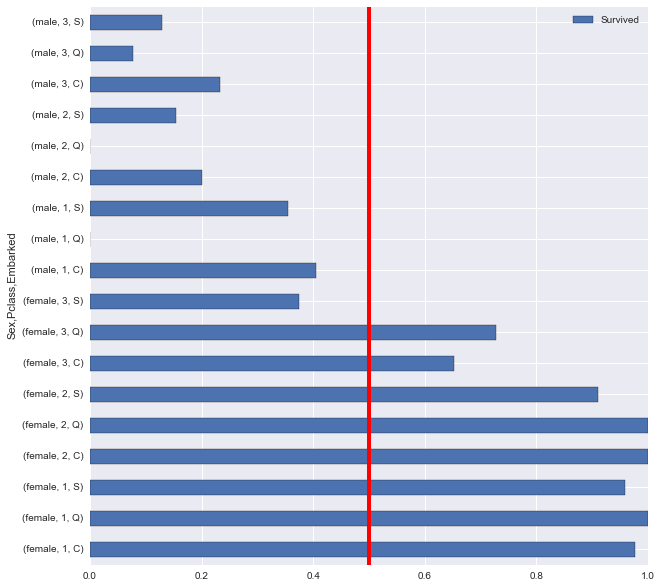

In [15]:
gender_class_embarked = pd.pivot_table(train, index=['Sex','Pclass','Embarked'],values=['Survived'])
gender_class_embarked
gender_class_embarked.plot(kind='barh', figsize=(10,10))
plt.axvline(x=.5, linewidth=4, color='r')

In [16]:
test = pd.read_csv("titanic/test.csv")
test['Survived'] = 0

test.loc[(test["Sex"] == "female"), "Survived"] = 1
test.loc[(test["Sex"] == "female")  & (test["Pclass"] == 3) &(test["Embarked"] == 'S'), "Survived"] = 0
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/gender_class_set.csv", index=False)

I never got to submit this csv. I wanted to look at females, pclass equals 3 and people who embarked from Southampton.